In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
titanic_data=pd.read_csv(r'D:\data_science_course\titanic\train.csv')

In [10]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_data = titanic_data[['PassengerId','Survived','Pclass','Name','Age','SibSp','Parch','Fare','Sex','Cabin','Embarked','Ticket']]

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Sex          891 non-null    object 
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Ticket       891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[['Survived', 'Pclass','Sex']]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

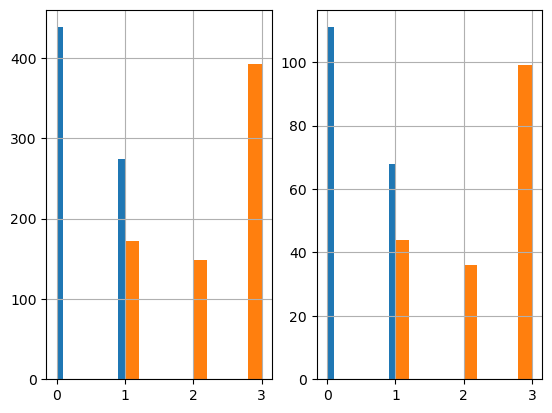

In [15]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.impute import SimpleImputer

class Ageimputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self,X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X
    

In [17]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ['C', 'S', 'Q', 'N']

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ['Female','Male']

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X


In [18]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        return X.drop(['Embarked','Name','Ticket','Cabin','N','Sex'],axis=1, errors='ignore')


In [19]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ageimputer', Ageimputer()),
                    ('featureencoder', FeatureEncoder()),
                    ('featuredropper', FeatureDropper())])

In [20]:
strat_train_set = pipeline.fit_transform(strat_train_set)


In [21]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
187,188,1,1,45.000000,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
279,280,1,3,35.000000,1,1,20.2500,0.0,0.0,1.0,1.0,0.0
781,782,1,1,17.000000,1,0,57.0000,0.0,0.0,1.0,1.0,0.0
255,256,1,3,29.000000,0,2,15.2458,1.0,0.0,0.0,1.0,0.0
241,242,1,3,29.652521,1,0,15.5000,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
365,366,0,3,30.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
85,86,1,3,33.000000,3,0,15.8500,0.0,0.0,1.0,1.0,0.0
634,635,0,3,9.000000,3,2,27.9000,0.0,0.0,1.0,1.0,0.0
837,838,0,3,29.652521,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [22]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 187 to 562
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [29]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'],axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [

    {'n_estimators': [10,100,200,500], 'max_depth': [None, 5, 10], 'min_samples_split': [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(x_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [32]:
final_clf = grid_search.best_estimator_

In [33]:
final_clf

RandomForestClassifier(max_depth=5, n_estimators=200)

In [34]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [35]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
508,509,0,3,28.000000,0,0,22.5250,0.0,0.0,1.0,0.0,1.0
391,392,1,3,21.000000,0,0,7.7958,0.0,0.0,1.0,0.0,1.0
578,579,0,3,29.906489,1,0,14.4583,1.0,0.0,0.0,1.0,0.0
741,742,0,1,36.000000,1,0,78.8500,0.0,0.0,1.0,0.0,1.0
814,815,0,3,30.500000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
666,667,0,2,25.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
183,184,1,2,1.000000,2,1,39.0000,0.0,0.0,1.0,0.0,1.0
439,440,0,2,31.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
820,821,1,1,52.000000,1,1,93.5000,0.0,0.0,1.0,1.0,0.0


In [37]:
x_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
x_data_test = scaler.fit_transform(x_test)
y_data_test = y_test.to_numpy()


In [38]:
final_clf.score(x_data_test, y_data_test)

0.8379888268156425

In [40]:
final_data = pipeline.fit_transform(titanic_data)

In [41]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [42]:
X_Final = final_data.drop(['Survived'],axis=1)
Y_Final = final_data['Survived']

scaler = StandardScaler()
X_Data_Final = scaler.fit_transform(X_Final)
Y_Data_Final = Y_Final.to_numpy()



In [43]:
prod_clf = RandomForestClassifier()

param_grid = [

    {'n_estimators': [10,100,200,500], 'max_depth': [None, 5, 10], 'min_samples_split': [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_Data_Final,Y_Data_Final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [45]:
prod_final_clf = grid_search.best_estimator_

In [46]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=200)

In [50]:
titanic_test_data = pd.read_csv(r'D:\data_science_course\titanic\test.csv')

In [51]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [56]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method='ffill')

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)


C:\Users\HP\AppData\Local\Temp\ipykernel_18360\1166326584.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method='ffill')


In [57]:
predictions = prod_final_clf.predict(X_data_final_test)

In [59]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('D:\data_science_course/titanic/predictions.csv', index=False)

In [62]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
